In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get instances from csv data

In [2]:
def readCSV(filePath):
  column_names = ['index', 'eps', 
                  'abonn_type', 'abonn_time', 'abonn_visit', 'abonn_status', 'abonn_lb', 
                  'base_type', 'base_time', 'base_visit', 'base_status', 'base_lb', 
                  'ab_type', 'ab_status', 'ab_time']
  df = pd.read_csv(filePath, sep=",", header=None, names=column_names)
  return df

# get data for figure 3

In [3]:
def histoData(file_path):
    df = readCSV(file_path)
    ins_num_10 = df[df['base_visit'] <= 10].shape[0]
    ins_num_50 = df[(df['base_visit'] > 10) & (df['base_visit'] <= 50)].shape[0]
    ins_num_100 = df[(df['base_visit'] > 50) & (df['base_visit'] <= 100)].shape[0]
    ins_num_200 = df[(df['base_visit'] > 100) & (df['base_visit'] <= 200)].shape[0]
    ins_num_500 = df[(df['base_visit'] > 200) & (df['base_visit'] <= 500)].shape[0]
    ins_num_1000 = df[(df['base_visit'] > 500) & (df['base_visit'] <= 1000)].shape[0]
    ins_num_2000 = df[(df['base_visit'] > 1000)].shape[0]
    return [ins_num_10, ins_num_50, ins_num_100, ins_num_200, ins_num_500, ins_num_1000, ins_num_2000]

In [4]:
print(histoData('../csv/mnistl2.csv'))
print(histoData('../csv/mnistl4.csv'))
print(histoData('../csv/base.csv'))
print(histoData('../csv/deep.csv'))
print(histoData('../csv/wide.csv'))

[33, 22, 8, 7, 9, 9, 24]
[22, 19, 6, 5, 42, 7, 3]
[9, 7, 8, 21, 36, 28, 6]
[11, 38, 21, 19, 12, 0, 0]
[16, 49, 19, 14, 15, 7, 0]


# make figure

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def getFigure3():
    files_list = [
        'mnistl2',
        'mnistl4',
        'base',
        'deep',
        'wide'
    ]
    colors = plt.cm.RdYlBu(np.linspace(0.1, 0.9, len(files_list)))
    fig, ax = plt.subplots(figsize=(11, 6))
    labels = ['$\mathdefault{MNIST_{L2}}$', '$\mathdefault{MNIST_{L4}}$',
              '$\mathdefault{CIFAR10_{BASE}}$', '$\mathdefault{CIFAR10_{DEEP}}$', 
              '$\mathdefault{CIFAR10_{WIDE}}$']

    bin_data = []
    for file_name in files_list:
        file_path = f'../csv/{file_name}.csv'
        bin_data.append(histoData(file_path))

    bins_tick = [0, 10, 50, 100, 200, 500, 1000, 2000]
    custom_labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '501-1000', '1000-']

    bin_data = np.array(bin_data)
    p = []

    # Plotting the histogram with increased spacing between bars
    bar_width = 0.8  # Decrease the width of the bars to increase spacing
    for bin_num, bins in enumerate(bin_data):
        bottom = np.sum(bin_data[:bin_num, :], axis=0)
        p.append(ax.bar(np.arange(len(bins_tick)-1) * 1.4, bins, bar_width, bottom=bottom, color=colors[bin_num], lw=0.4, ec='k'))

    # Set the x-ticks and labels with custom ranges
    ax.set_xticks(np.arange(len(bins_tick)-1) * 1.4)
    ax.set_xticklabels(custom_labels, fontsize=18)

    ax.set_xlim(-0.6, (len(bins_tick)-1) * 1.4 - 0.6)

    ax.yaxis.set_tick_params(labelsize=18)

    ax.legend(handles=p, labels=labels, fontsize=14)
    ax.set_ylabel('Number of problem instances', fontsize=20)
    ax.set_xlabel('Number of nodes in BaB trees', fontsize=20)

    # Adjusting the margins
    plt.subplots_adjust(left=0.1, right=0.9)

    plt.savefig('../pdf/histo.pdf', bbox_inches='tight')



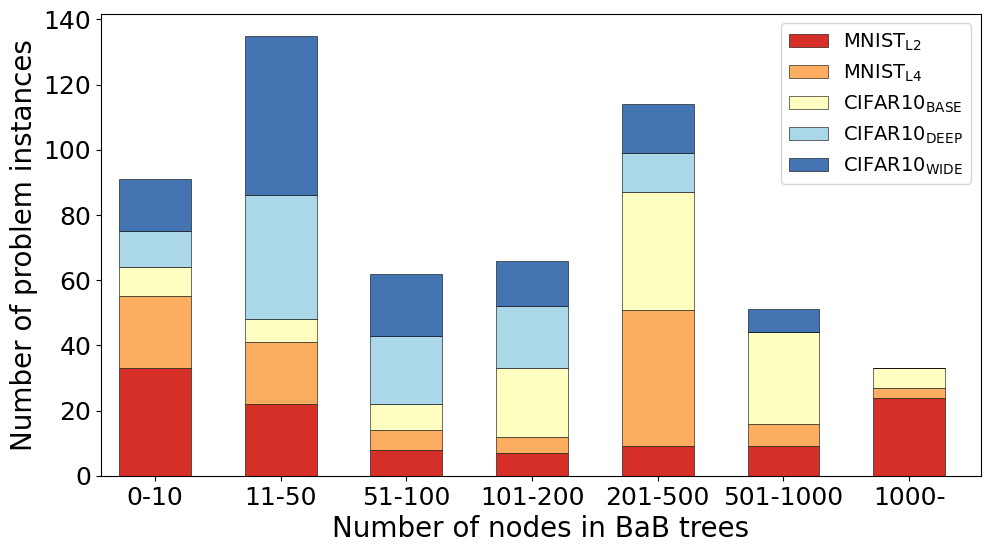

In [6]:
getFigure3()

In [7]:
def countInstances():
  files_list = [
    'mnistl2',
    'mnistl4',
    'base',
    'deep',
    'wide'
  ]
  count = 0
  for filePath in files_list:
    df = readCSV(f'../csv/{filePath}.csv')
    print(f'{filePath}: ', df.shape[0])
    count += df.shape[0]
  print('total: ', count)

In [8]:
countInstances()

mnistl2:  112
mnistl4:  104
base:  115
deep:  101
wide:  120
total:  552
